#Simple Linear regression by hand

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [16]:
housing = df[df.district=='Чиланзарский']
housing.drop(index=housing[housing.price == 'Договорная'].index, inplace=True)

In [9]:
X = pd.to_numeric(housing['size'])
Y = pd.to_numeric(housing['price'])

In [26]:
hDf = pd.DataFrame(data=X, columns=['size'])
hDf['price'] = Y
hDf.drop(index=hDf[hDf.price > 200000].index, inplace=True)
hDf.drop(index=hDf[hDf['size'] > 200].index, inplace=True)

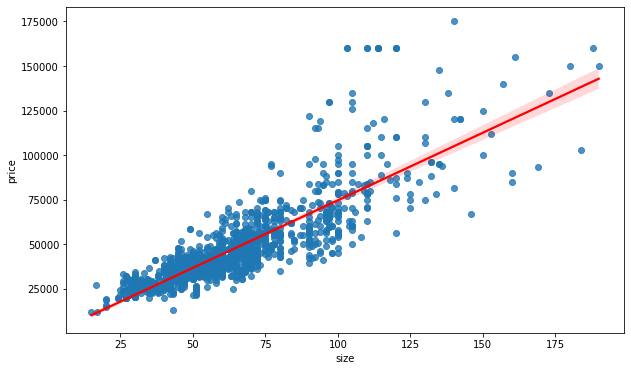

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(data=hDf, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [32]:
x_mean = X.values.mean()
y_mean = Y.values.mean()

In [42]:
theta_num = 0
theta_denom = 0
for i, j in zip(X.values, Y.values):
  theta_num = theta_num + (i-x_mean) * (j-y_mean)
  theta_denom = theta_denom + (i-x_mean) * (i-x_mean) 

In [44]:
theta1 = theta_num / theta_denom
theta0 = y_mean - theta1 * x_mean

In [45]:
def simp_regression(x):
  return theta0 + theta1 * x

In [58]:
y_predicted = simp_regression(X.values)

In [53]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(Y.values, y_predicted)
# RMSE hisoblaymiz
rmse = np.sqrt(lin_mse)
print(rmse)

168553.10224581318
